### Importing Required Libraries
In this section, we import essential Python libraries for data manipulation, preprocessing, and model training.

- `pandas` and `numpy` for data handling.
- `sklearn` for preprocessing and model selection.
- `xgboost` for implementing the XGBoost classifier.
- `optuna` for hyperparameter tuning.

In [39]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle


### Loading the Dataset
- Here, we load the dataset using `pandas.read_csv()`.
- We display the first few rows to understand the structure of the data.
- This step helps in identifying missing values and feature distributions

In [65]:
data = pd.read_csv("/content/drive/MyDrive/CosmicClassifier/cosmicclassifierTraining.csv")
T_data = pd.read_csv("/content/drive/MyDrive/CosmicClassifier/cosmicclassifierTest.csv")
data.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [41]:
T_data.tail()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
9995,1.185221,-2.146064,-0.145847,1.056399,3.201846,3.729891,3.100994,Category_11,Category_5,-0.147794
9996,2.257602,-2.714023,-3.215728,-0.753216,0.460961,-0.793091,2.672126,Category_16,Category_8,-0.157080
9997,-1.059609,2.340662,1.392567,-1.627227,2.634176,0.638663,-0.165413,Category_6,Category_9,-3.148313
9998,-1.231524,-0.425901,2.520917,-0.993503,-0.577048,-1.083454,0.636375,Category_11,Category_11,-0.844913
9999,4.087755,-0.354955,2.769087,3.316833,0.734191,-2.685015,1.947903,Category_6,Category_10,0.213196


Checking for counts of each class in target feature





In [42]:
data["Prediction"].value_counts()

,count
Prediction,
1.0,6393
7.0,5929
3.0,5814
9.0,5650
2.0,5647
6.0,5638
0.0,5637
8.0,5568
4.0,5553


In [43]:
data["Magnetic Field Strength"].value_counts()

,count
Magnetic Field Strength,
Category_9,8977
Category_8,8917
Category_10,7892
Category_7,6121
Category_11,6103
Category_12,4519
Category_6,3495
Category_13,3178
Category_14,2147


In [44]:
data.shape

(60000, 11)

### Handling Missing Values
- We check for missing values in the dataset using `isnull().sum()`.
- If any missing values are found, we decide whether to drop or impute them.

In [45]:
data.isnull().sum()

,0
Atmospheric Density,2984
Surface Temperature,3032
Gravity,2984
Water Content,3077
Mineral Abundance,2921
Orbital Period,2997
Proximity to Star,2945
Magnetic Field Strength,3058
Radiation Levels,3021
Atmospheric Composition Index,2942


### Exploratory Data Analysis (EDA)
- We use `value_counts()` to check the distribution of the target variable.
- Understanding class distribution helps in handling class imbalance if necessary.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Atmospheric Density            57016 non-null  float64
 1   Surface Temperature            56968 non-null  float64
 2   Gravity                        57016 non-null  float64
 3   Water Content                  56923 non-null  float64
 4   Mineral Abundance              57079 non-null  float64
 5   Orbital Period                 57003 non-null  float64
 6   Proximity to Star              57055 non-null  float64
 7   Magnetic Field Strength        56942 non-null  object 
 8   Radiation Levels               56979 non-null  object 
 9   Atmospheric Composition Index  57058 non-null  float64
 10  Prediction                     56961 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.0+ MB


In [47]:
y=data.Prediction.value_counts()

In [48]:
y

,count
Prediction,
1.0,6393
7.0,5929
3.0,5814
9.0,5650
2.0,5647
6.0,5638
0.0,5637
8.0,5568
4.0,5553


Performing statistical Analysis

In [49]:
data.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Prediction
count,57016.000000,56968.000000,57016.000000,56923.000000,57079.000000,57003.000000,57055.000000,57058.000000,56961.000000
mean,-0.000202,-0.000288,-0.000469,0.001938,-0.000730,-0.001043,0.000188,0.000211,4.454381
std,2.263527,1.936598,1.804605,1.689267,1.605524,1.511685,1.316682,1.120303,2.890055
min,-4.364843,-5.503527,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,-4.007504,0.000000
25%,-1.555810,-1.426786,-1.279002,-1.218870,-1.078449,-1.048920,-0.937097,-0.709852,2.000000
50%,-0.188670,-0.330037,0.046231,-0.004676,0.040008,0.036651,-0.062001,0.049292,4.000000
75%,1.308113,1.503646,1.255432,1.063391,1.095483,1.058800,0.888149,0.789511,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.584059,5.111014,4.942699,3.852567,9.000000


### Encoding the Target Variable
- The categorical target variable is converted into numeric values using `LabelEncoder()`.
- This ensures compatibility with machine learning models that expect numerical input.
- The `LabelEncoder` is saved for future use (e.g., encoding test data).

### Feature Engineering: Target Encoding
- Target encoding is applied to categorical features.
- It replaces categorical values with the mean of the target variable for each category.
- This helps in improving model performance by providing better numerical representations.
- `KFold` is used to prevent data leakage by encoding within each fold.

One-hot encoding for strings in data for correlating with other features

In [66]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

encoding_maps = {}


for col in ['Magnetic Field Strength', 'Radiation Levels']:
    if col not in data.columns:
        raise KeyError(f" Column '{col}' is missing in the DataFrame!")

    data[col + '_Encoded'] = 0  # Placeholder

    for train_idx, val_idx in kf.split(data):
        train_fold, val_fold = data.iloc[train_idx], data.iloc[val_idx]

        if col not in train_fold.columns:
            raise KeyError(f" Column '{col}' is missing in train_fold!")

        means = train_fold.groupby(col)['Prediction'].mean()
        data.loc[val_idx, col + '_Encoded'] = data.loc[val_idx, col].map(means)  #

    # Computing the final encoding map from full training data
    encoding_map = data.groupby(col)['Prediction'].mean().to_dict()
    encoding_maps[col] = encoding_map  # Store it

    # For Handling NaN values (if a category is missing in a fold)
    global_mean = data['Prediction'].mean()
    data[col + '_Encoded'].fillna(global_mean, inplace=True)

<ipython-input-66-621ac75c79ef>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.28137432 4.27363675 4.34203063 ... 4.46938776 4.93014475 4.27363675]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[val_idx, col + '_Encoded'] = data.loc[val_idx, col].map(means)  # Apply to validation fold
<ipython-input-66-621ac75c79ef>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col + '_Encoded'].

Save encoding maps for later use in test data


In [67]:
with open('target_encoding.pkl', 'wb') as f:
    pickle.dump({'encoding_maps': encoding_maps, 'global_mean': global_mean}, f)
print("✔ Encoding maps saved successfully!")

✔ Encoding maps saved successfully!


We drop "Magnetic Field Strength" and "Radiation Levels" from data and add Prediction at the end

In [68]:
data = data.drop(columns=["Magnetic Field Strength", "Radiation Levels"],axis=0)

cols = [col for col in data.columns if col != 'Prediction'] + ['Prediction']
data = data[cols]

In [54]:
data.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Encoded,Radiation Levels_Encoded,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,0.692907,4.454381,4.378043,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,NaN,4.438963,4.781003,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,-0.677182,4.454381,4.751297,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,0.109429,4.454381,4.145694,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,0.407941,5.281374,4.481539,9.0
5,0.749979,1.064353,2.510823,0.105772,1.203825,1.355501,NaN,0.551453,4.492656,4.757775,2.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,1.876232,4.273637,4.587825,1.0
7,1.981474,-1.347445,-0.483752,-3.365811,2.690204,1.199946,-1.907013,0.443053,4.342031,4.032992,NaN
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,0.934055,4.316818,4.633173,1.0
9,-1.188687,1.775882,2.666702,0.434578,0.205058,NaN,-1.545261,-1.973059,4.480705,4.768361,4.0


In [55]:
data.Prediction.value_counts()

,count
Prediction,
1.0,6393
7.0,5929
3.0,5814
9.0,5650
2.0,5647
6.0,5638
0.0,5637
8.0,5568
4.0,5553


We'll find the correlation amongst the features

In [69]:
corr=data.corr()
corr

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Encoded,Radiation Levels_Encoded,Prediction
Atmospheric Density,1.000000,0.000960,-0.000753,0.000635,0.001429,-0.000198,-0.000161,-0.001321,0.039966,-0.078063,-0.151239
Surface Temperature,0.000960,1.000000,-0.001313,0.002299,0.000193,-0.002521,-0.001105,-0.001288,0.036187,0.120624,0.489876
Gravity,-0.000753,-0.001313,1.000000,-0.001121,0.001269,0.001597,0.001019,-0.001716,-0.003665,-0.097341,-0.078721
Water Content,0.000635,0.002299,-0.001121,1.000000,0.000907,-0.000059,0.000530,0.000088,0.002198,-0.045702,-0.156942
Mineral Abundance,0.001429,0.000193,0.001269,0.000907,1.000000,0.000518,0.000525,-0.000412,0.053104,-0.078003,0.324314
Orbital Period,-0.000198,-0.002521,0.001597,-0.000059,0.000518,1.000000,0.000466,-0.000827,0.006235,-0.134525,-0.061242
Proximity to Star,-0.000161,-0.001105,0.001019,0.000530,0.000525,0.000466,1.000000,0.000260,-0.018708,0.025901,0.000133
Atmospheric Composition Index,-0.001321,-0.001288,-0.001716,0.000088,-0.000412,-0.000827,0.000260,1.000000,-0.012367,-0.031162,-0.083620
Magnetic Field Strength_Encoded,0.039966,0.036187,-0.003665,0.002198,0.053104,0.006235,-0.018708,-0.012367,1.000000,0.070602,0.100620
Radiation Levels_Encoded,-0.078063,0.120624,-0.097341,-0.045702,-0.078003,-0.134525,0.025901,-0.031162,0.070602,1.000000,0.118494


<Axes: >

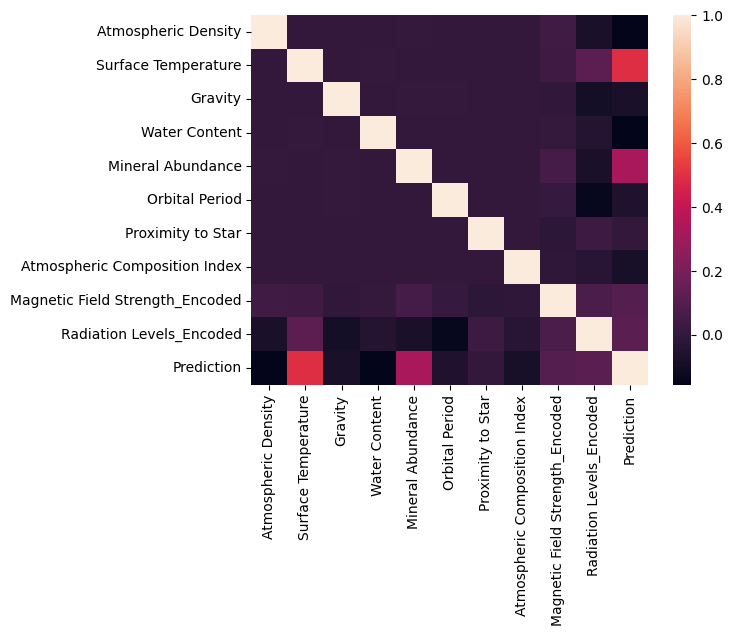

In [71]:
import seaborn as sns
sns.heatmap(corr)

This will ensures that The two categorical features are converted into numericals and null values are filled with appropriate values

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Atmospheric Density              57016 non-null  float64
 1   Surface Temperature              56968 non-null  float64
 2   Gravity                          57016 non-null  float64
 3   Water Content                    56923 non-null  float64
 4   Mineral Abundance                57079 non-null  float64
 5   Orbital Period                   57003 non-null  float64
 6   Proximity to Star                57055 non-null  float64
 7   Atmospheric Composition Index    57058 non-null  float64
 8   Magnetic Field Strength_Encoded  60000 non-null  float64
 9   Radiation Levels_Encoded         60000 non-null  float64
 10  Prediction                       56961 non-null  float64
dtypes: float64(11)
memory usage: 5.0 MB


In [74]:
from xgboost import XGBRegressor

#Filling Missing Values Using `XGBoost Regression`
Handling missing data is a crucial step in data preprocessing, especially in scientific and predictive modeling tasks. Traditional imputation techniques like mean, median, or mode substitution can often oversimplify relationships within data. A more robust approach is using machine learning models to predict missing values based on existing patterns.

In this article, we leverage XGBoost Regression to intelligently impute missing values across multiple features in a dataset.

#Why XGBoost for Imputation?
XGBoost is a powerful gradient boosting algorithm known for its efficiency and predictive accuracy. By treating missing value imputation as a regression problem, we ensure that the imputed values maintain consistency with the data’s overall structure.

**Implementation**
Below is a Python snippet that automates missing value imputation for multiple columns using XGBoostRegressor:


In [77]:
from xgboost import XGBRegressor

# Columns with missing values in your dataset
missing_cols = [
    "Atmospheric Density", "Surface Temperature", "Gravity", "Water Content",
    "Mineral Abundance", "Orbital Period", "Proximity to Star",
    "Atmospheric Composition Index", "Magnetic Field Strength_Encoded",
    "Radiation Levels_Encoded"
]

# Fill missing values for each column using XGBoost
for col in missing_cols:
    print(f"Filling missing values for: {col}")

    # Splitting data based on missing values
    train_data = data[data[col].notna()]  # Rows where the column is not missing
    test_data = data[data[col].isna()]    # Rows where the column is missing

    if not test_data.empty:  # Proceed only if there are missing values
        # Features and target
        X_train = train_data.drop(columns=[col])  # All features except target column
        y_train = train_data[col]                 # The column to be predicted
        X_test = test_data.drop(columns=[col])    # Features for missing rows

        # Train XGBoost model
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
        model.fit(X_train, y_train)

        # Predict missing values and fill them in the dataset
        data.loc[data[col].isna(), col] = model.predict(X_test)

print("All missing values have been filled successfully!")


Filling missing values for: Atmospheric Density
Filling missing values for: Surface Temperature
Filling missing values for: Gravity
Filling missing values for: Water Content
Filling missing values for: Mineral Abundance
Filling missing values for: Orbital Period
Filling missing values for: Proximity to Star
Filling missing values for: Atmospheric Composition Index
Filling missing values for: Magnetic Field Strength_Encoded
Filling missing values for: Radiation Levels_Encoded
All missing values have been filled successfully!


This will ensures that the all dependent features are filled with XGBoost regressor predicted values

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Atmospheric Density              60000 non-null  float64
 1   Surface Temperature              60000 non-null  float64
 2   Gravity                          60000 non-null  float64
 3   Water Content                    60000 non-null  float64
 4   Mineral Abundance                60000 non-null  float64
 5   Orbital Period                   60000 non-null  float64
 6   Proximity to Star                60000 non-null  float64
 7   Atmospheric Composition Index    60000 non-null  float64
 8   Magnetic Field Strength_Encoded  60000 non-null  float64
 9   Radiation Levels_Encoded         60000 non-null  float64
 10  Prediction                       56961 non-null  float64
dtypes: float64(11)
memory usage: 5.0 MB


In [79]:
data.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Encoded,Radiation Levels_Encoded,Prediction
0,0.472806,-0.003258,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,0.692907,4.454381,4.378043,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,0.708350,4.438963,4.781003,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,-0.677182,4.454381,4.751297,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,0.109429,4.454381,4.145694,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,0.407941,5.281374,4.481539,9.0
5,0.749979,1.064353,2.510823,0.105772,1.203825,1.355501,-0.214537,0.551453,4.492656,4.757775,2.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,1.876232,4.273637,4.587825,1.0
7,1.981474,-1.347445,-0.483752,-3.365811,2.690204,1.199946,-1.907013,0.443053,4.342031,4.032992,NaN
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,0.934055,4.316818,4.633173,1.0
9,-1.188687,1.775882,2.666702,0.434578,0.205058,0.201274,-1.545261,-1.973059,4.480705,4.768361,4.0


In [80]:
data.Prediction.value_counts()

,count
Prediction,
1.0,6393
7.0,5929
3.0,5814
9.0,5650
2.0,5647
6.0,5638
0.0,5637
8.0,5568
4.0,5553


### Training the XGBoost Model
- We initialize the `XGBClassifier` with predefined hyperparameters.
- The model is trained using `fit()` on the training data.
- Feature importance is extracted to understand which variables contribute most to predictions.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [82]:
target_feature = "Prediction"


Dividing data into train_data with non-null values and test_data with all null values, after that the non-null values further classified into X_train, X_val, y_train and y_val.

In [84]:
train_data = data[data[target_feature].notna()]
test_data = data[data[target_feature].isna()]

# Define features and target
X = train_data.drop(columns=[target_feature])  # Features
y = train_data[target_feature]  # Target (Encoded)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
y.value_counts()

,count
Prediction,
1.0,6393
7.0,5929
3.0,5814
9.0,5650
2.0,5647
6.0,5638
0.0,5637
8.0,5568
4.0,5553


Now, An XGBClassifier is trained on above mentioned splits and feeded to the model for predicting the null values based on teh relation non-null values w.r.t its Prediction values

In [86]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    tree_method="hist",
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:08:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluating Model Performance
- The trained model is tested on the test data using `predict()`.
- Accuracy and classification reports are generated to assess model performance.
- Confusion matrix visualization helps in understanding misclassifications.

In [87]:
# Validate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9019


Got `90.19%` accuracy is achieved for Predicting the Target column using `XGBClassifier`

In [89]:
data.corr()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Encoded,Radiation Levels_Encoded,Prediction
Atmospheric Density,1.000000,-0.000201,0.000251,0.000475,-0.001090,0.000225,0.001193,0.000628,0.040624,-0.078897,-0.152688
Surface Temperature,-0.000201,1.000000,-0.000706,0.001338,0.000424,-0.001093,0.000365,-0.000215,0.036053,0.121741,0.492703
Gravity,0.000251,-0.000706,1.000000,-0.001088,0.000242,0.000849,0.000576,-0.000381,-0.003785,-0.100030,-0.080471
Water Content,0.000475,0.001338,-0.001088,1.000000,0.001190,-0.000694,-0.000866,0.000786,0.001545,-0.045691,-0.158749
Mineral Abundance,-0.001090,0.000424,0.000242,0.001190,1.000000,0.000509,-0.001020,-0.000997,0.053230,-0.078634,0.328076
Orbital Period,0.000225,-0.001093,0.000849,-0.000694,0.000509,1.000000,0.000601,-0.000847,0.007395,-0.134124,-0.061183
Proximity to Star,0.001193,0.000365,0.000576,-0.000866,-0.001020,0.000601,1.000000,-0.000438,-0.018738,0.027171,0.000895
Atmospheric Composition Index,0.000628,-0.000215,-0.000381,0.000786,-0.000997,-0.000847,-0.000438,1.000000,-0.011875,-0.032135,-0.083262
Magnetic Field Strength_Encoded,0.040624,0.036053,-0.003785,0.001545,0.053230,0.007395,-0.018738,-0.011875,1.000000,0.070602,0.100620
Radiation Levels_Encoded,-0.078897,0.121741,-0.100030,-0.045691,-0.078634,-0.134124,0.027171,-0.032135,0.070602,1.000000,0.118494


Predicted the Missing values using Trained `XGBClassifier()`

In [90]:
test_data = data[data["Prediction"].isna()].drop("Prediction", axis=1)
predicted_values = model.predict(test_data)
data.loc[data["Prediction"].isna(), "Prediction"] = predicted_values


This indicated that every missing values in feature is properly filled using appropriate ML techniques

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Atmospheric Density              60000 non-null  float64
 1   Surface Temperature              60000 non-null  float64
 2   Gravity                          60000 non-null  float64
 3   Water Content                    60000 non-null  float64
 4   Mineral Abundance                60000 non-null  float64
 5   Orbital Period                   60000 non-null  float64
 6   Proximity to Star                60000 non-null  float64
 7   Atmospheric Composition Index    60000 non-null  float64
 8   Magnetic Field Strength_Encoded  60000 non-null  float64
 9   Radiation Levels_Encoded         60000 non-null  float64
 10  Prediction                       60000 non-null  float64
dtypes: float64(11)
memory usage: 5.0 MB


In [95]:
data.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Encoded,Radiation Levels_Encoded,Prediction
0,0.472806,-0.003258,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,0.692907,4.454381,4.378043,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,0.708350,4.438963,4.781003,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,-0.677182,4.454381,4.751297,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,0.109429,4.454381,4.145694,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,0.407941,5.281374,4.481539,9.0


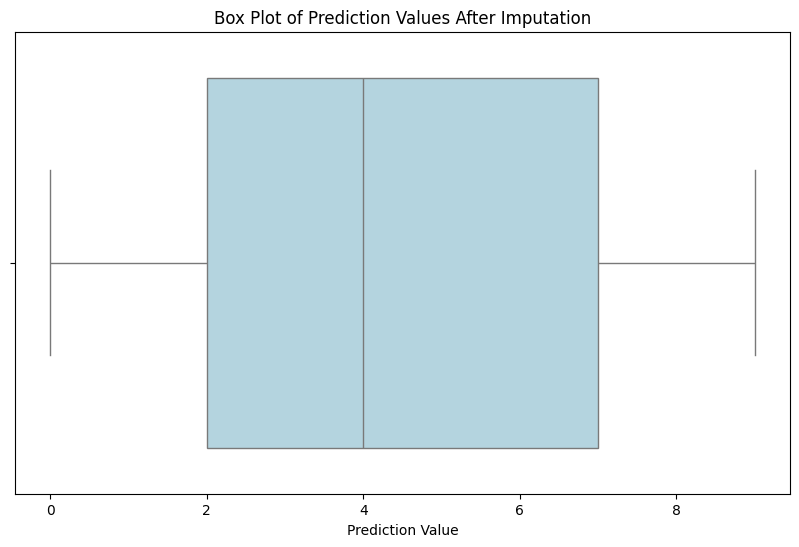

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Box plot for original and imputed data
sns.boxplot(data=data, x="Prediction", color="lightblue")

plt.title("Box Plot of Prediction Values After Imputation")
plt.xlabel("Prediction Value")
plt.show()


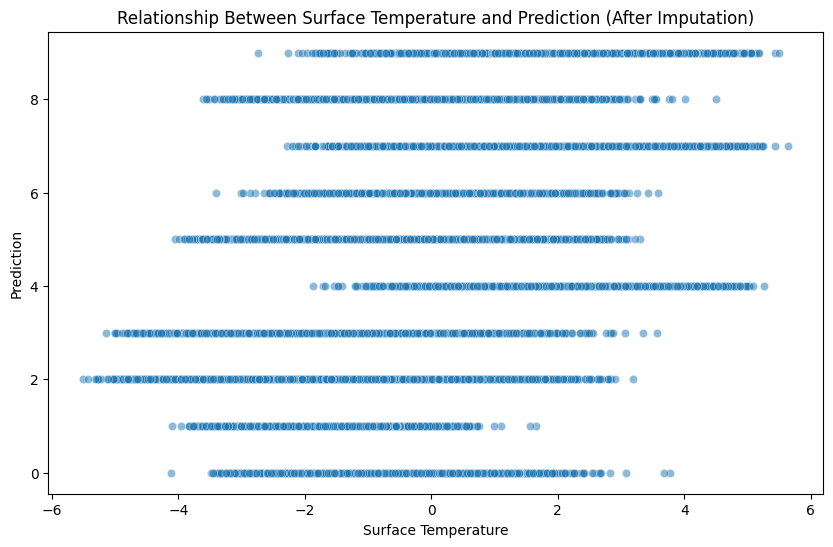

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Surface Temperature", y="Prediction", alpha=0.5)
plt.title("Relationship Between Surface Temperature and Prediction (After Imputation)")
plt.xlabel("Surface Temperature")
plt.ylabel("Prediction")
plt.show()


Now dividing main training data into `a(dependent)` and `b(Target)` variables and further divided into training and testing with 25-75 ratio for recognising between previous variables

In [100]:
a=data.drop(columns=["Prediction"],axis=0)
b=data.Prediction

In [101]:
b.value_counts()

,count
Prediction,
1.0,6734
7.0,6250
3.0,6132
9.0,5953
2.0,5936
0.0,5923
6.0,5920
8.0,5879
4.0,5839


In [102]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.25, random_state=42)

In [103]:
b_test.shape

(15000,)

An XGBClassifier is trained on `randomHyperparameters` and splitted data. Prediction is carried out with an accuracy of `89.40%`

In [104]:
XGb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    tree_method="hist",
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Train the model
XGb_model.fit(a_train, b_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:12:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [105]:
b_pred_XGB = XGb_model.predict(a_test)

In [106]:
print("Accuracy of XGboost",accuracy_score(b_test,b_pred_XGB))

Accuracy of XGboost 0.8940666666666667


Now, We'll try to optimize model by using GridSearchCV hyperParameterTuning  Technique and the best parameters were selected based on output

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [4, 6, 9],
}

grid_search = GridSearchCV(XGBClassifier(tree_method="hist", use_label_encoder=False), param_grid, scoring='accuracy', cv=5)
grid_search.fit(a_train, b_train)

best_model = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:15:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:15:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:15:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:15:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:15:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

The HyperParameters are found to be XXXX after `GridSearchCV` Method

In [108]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 300}


In [109]:
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Cross-Validation Accuracy: 0.9119111111111111


The data is now trained to the best model after Optimizing the model performance

In [111]:
#training Best Model
best_model.fit(a_train, b_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

`Predicting` with the optimized model

In [112]:
b_pred_XGB = XGb_model.predict(a_test)

In [113]:
print("Accuracy of improved XGboost",accuracy_score(b_test,b_pred_XGB))

Accuracy of improved XGboost 0.8940666666666667


In [114]:
type(b_pred_XGB)

numpy.ndarray

In [115]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

Loading the `encoder` which is  used while training, Also droping "Magnetic Field Strength" , "Radiation Levels" afterwards

In [116]:
with open('target_encoding.pkl', 'rb') as f:
    encoding_data = pickle.load(f)

encoding_maps = encoding_data['encoding_maps']
global_mean = encoding_data['global_mean']

# Apply encoding to test data, but only if the column exists
for col in ['Magnetic Field Strength', 'Radiation Levels']:
    # Check if the column exists in the test DataFrame
    if col in T_data.columns:
        T_data[col + '_Encoded'] = T_data[col].map(encoding_maps[col]).fillna(global_mean)
    else:
        print(f"Warning: Column '{col}' not found in test data. Skipping encoding.")  # Print a warning

print("✔ Test data encoded successfully!")
#test=test.drop(columns=["Magnetic Field Strength","Radiation Levels"],axis=1) # No need to drop if they don't exist
T_data=T_data.drop(columns=["Magnetic Field Strength","Radiation Levels"],axis=1)
T_data.head()

✔ Test data encoded successfully!


,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Magnetic Field Strength_Encoded,Radiation Levels_Encoded
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,-0.729809,4.220373,4.371826
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,-0.341850,4.498187,4.511868
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,-0.532658,4.423850,4.766795
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,-0.205558,4.478092,4.766795
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,0.763087,4.498187,4.371826


In [117]:
Y_PRED=best_model.predict(T_data)

The `final_predicted_column` is exported to local

In [118]:
Y_Series=pd.Series(Y_PRED)
Y_Series.value_counts()

,count
1,1150
2,1038
9,1037
3,1010
7,1004
0,991
4,961
6,958
8,940
5,911
